# PSA vs Autoencoder

In [1]:
import numpy as np 
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X.min(), X.max()

(np.float64(0.1), np.float64(7.9))

In [4]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.min(), X_scaled.max()

(np.float64(0.0), np.float64(1.0))

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(150, 2)

### Autoencoder

In [ ]:
encoding_dim = 2 # Dimensiones del encoder, lo que se quiere de salida

autoencoder = Sequential([
    # encoder
    Dense(encoding_dim, input_shape = (X_scaled.shape[1],),activation = "relu"),
 
    # encoder
    Dense(X_scaled.shape[1], activation="relu")
])

In [66]:
autoencoder.compile(
    optimizer=Adam(),
    loss="mean_squared_error"
)

In [67]:
autoencoder.fit(
    x = X_scaled,
    y = X_scaled,
    epochs = 10,
    batch_size = 16,
    shuffle = True
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2587
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2509 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2425 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2327 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2230 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2124 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2032 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1934 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1848 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1775 


In [68]:
# Tomar solo el encoder
encoder = Sequential(autoencoder.layers[:1])
encoder

<Sequential name=sequential_15, built=True>

In [69]:
X_autoencoder = encoder.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [70]:
X_autoencoder.shape

(150, 2)

Text(0.5, 1.0, 'Autoencoder Reduction')

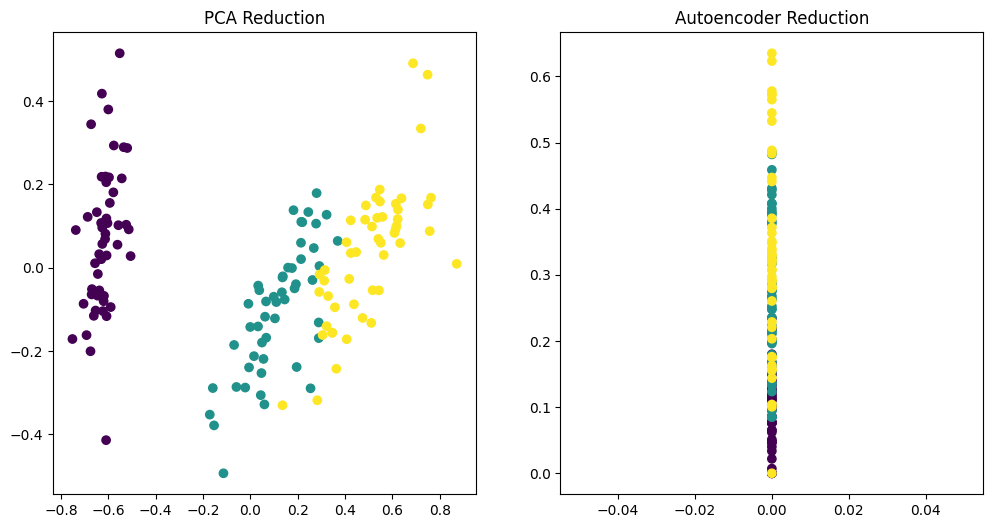

In [71]:
plt.figure(figsize=(12, 6))


# X_pca
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1],c=y)
plt.title("PCA Reduction")

# X_Autoencoder
plt.subplot(1,2,2)
plt.scatter(X_autoencoder[:,0], X_autoencoder[:,1],c=y)
plt.title("Autoencoder Reduction")